In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [4]:
# loading the data
df = pd.read_csv('C:/Users/Sumanth/Downloads/Rice_data_type.csv')

In [5]:
df

,Unnamed: 0,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'
1,1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,b'Cammeo'
2,2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,b'Cammeo'
3,3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,b'Cammeo'
4,4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,b'Cammeo'
...,...,...,...,...,...,...,...,...,...
3805,3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,b'Osmancik'
3806,3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,b'Osmancik'
3807,3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,b'Osmancik'
3808,3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,b'Osmancik'


In [6]:
#viewing the columns
df.columns


Index(['Unnamed: 0', 'Area', 'Perimeter', 'Major_Axis_Length',
       'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent', 'Class'],
      dtype='object')

In [7]:
# dropping column
df = df.drop('Unnamed: 0', axis=1)


In [8]:
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,b'Cammeo'
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,b'Cammeo'
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,b'Cammeo'
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,b'Cammeo'
...,...,...,...,...,...,...,...,...
3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,b'Osmancik'
3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,b'Osmancik'
3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,b'Osmancik'
3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,b'Osmancik'


In [9]:
#viewing the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(7), object(1)
memory usage: 238.3+ KB


In [10]:
#count the unique values in the class
df['Class'].value_counts()

Class
b'Osmancik'    2180
b'Cammeo'      1630
Name: count, dtype: int64

In [11]:
# Map the class labels to numerical values
# Assuming 'b\'Osmancik\'' is mapped to 1 and 'b\'Cammeo\'' is mapped to 0
df['Class'] = df['Class'].map({'b\'Osmancik\'': 1, 'b\'Cammeo\'': 0})



In [12]:
# Features (excluding the target column)
X = df.drop(columns=['Class'])
 # Target variable
y = df['Class']                  


In [13]:
X

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024
...,...,...,...,...,...,...,...
3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012
3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279
3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739
3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064


In [14]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3805    1
3806    1
3807    1
3808    1
3809    1
Name: Class, Length: 3810, dtype: int64

In [15]:
# Split the data into training and testing sets
# X: Features, y: Target variable
# test_size: Proportion of the dataset to include in the test split (20% in this case)
# random_state: Seed for the random number generator for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [16]:
#viewing the lenght of the train data
len(X_train)


3048

In [17]:
X_test

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
1907,9843.0,383.115997,154.950317,81.356834,0.851071,10024.0,0.702269
321,14400.0,481.506012,193.782959,96.516190,0.867141,14876.0,0.683891
372,13272.0,471.899994,201.494690,84.153793,0.908609,13492.0,0.565729
1026,16413.0,510.109985,210.555115,100.121895,0.879708,16665.0,0.599890
2823,12605.0,445.692993,183.269257,88.236824,0.876468,12787.0,0.617589
...,...,...,...,...,...,...,...
2353,10725.0,411.691010,164.600342,84.292969,0.858922,11009.0,0.666149
1791,11639.0,432.386993,178.694855,83.954514,0.882762,11940.0,0.593584
730,14840.0,512.007996,220.514313,86.415024,0.920017,15160.0,0.564173
616,13501.0,472.483002,198.072037,87.689613,0.896662,13787.0,0.634028


In [18]:
from sklearn.model_selection import GridSearchCV

# Example grid search for 'n_neighbors'
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN classifier and perform Grid Search
# cv: Number of folds in cross-validation (5 in this case)

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Fit the model to the training data to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameter
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"Best k value: {best_n_neighbors}")


Best k value: 3


In [19]:
# Create a KNN classifier with 3 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [20]:
#fitting the  traning data to the classifier
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
# Make predictions on the test data using the trained KNN classifier
y_pred = knn_classifier.predict(X_test)

In [22]:
# Calculate the accuracy of the KNN classifier on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8818897637795275
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.87       354
           1       0.86      0.92      0.89       408

    accuracy                           0.88       762
   macro avg       0.88      0.88      0.88       762
weighted avg       0.88      0.88      0.88       762



In [23]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[295  59]
 [ 31 377]]


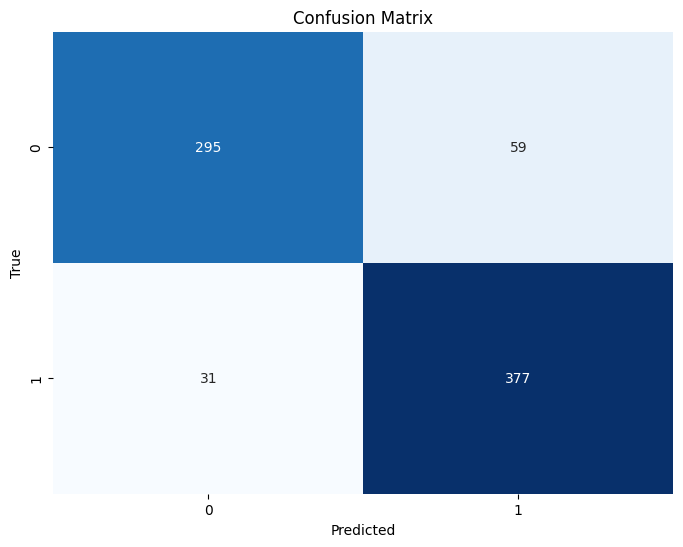

In [24]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()